## Loan Application Status Project

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv(r'D:\Files\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This data frame contains information related to **Loan Application Status**. It contains **614 rows and 13 columns** out of which **12 columns are inputs** and **1 column is target variable** i.e. **'Loan_Status' column**.  
  
The data frame contains both  **numeric and catagorical data.** Target variable has catagorical data thus it represents a **Classification Problem**.  
  
***The goal is to predict whether the loan of the applicant will be approved or not.***    

In [3]:
#Checking data type of columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are **three types** of data present in this data frame which are **object, int64 and float64**. **Majority** of the data types are **'object'**.

In [4]:
#checking for whitespace characters in columns of data frame
col=df.columns.tolist() #Storing columns name as list in 'col' variable

space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable

for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not df.loc[df[i]==space].empty:#Checking if any row contains white space characters
            
            validation+=1#increasing 1 in 'validation' variable
            
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [5]:
df.isnull().sum() #Checking if null values are present in data frame 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History'** features contains null values.

Using mode "Male" of Gender column
Using mode "Yes" of Married column
Using mode "0" of Dependents column
Using mode "No" of Self_Employed column
Using mean "146.41216216216216" of LoanAmount column
Using mean "342.0" of Loan_Amount_Term column
Using mean "0.8421985815602837" of Credit_History column


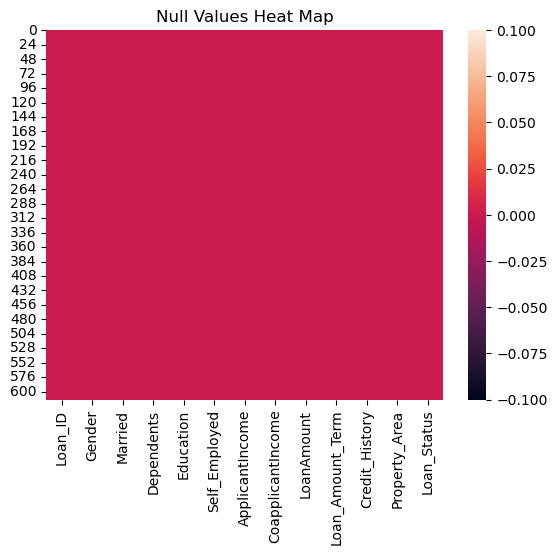

In [6]:
#creating list of columns which contains null values
a=['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for i in a:#iterating through 'a' list
    
    if df[i].dtypes=='object': #using if condition to check for 'object' data type
        
        mode=df[i].mode()[0] #calculating mode
        
        df[i].fillna(mode,inplace=True)
        
        print(f'Using mode "{mode}" of {i} column')#printing
        
    elif df[i].dtypes=='int64' or 'float64': #using elif condition to check for 'float64' and 'int64' data types
        
        mean=df[i].mean()#calculating mean
        
        df[i].fillna(mean,inplace=True)
        
        print(f'Using mean "{mean}" of {i} column')#printing
        
sb.heatmap(df.isnull())#Visualizing null values via Heatmap
plt.title('Null Values Heat Map')
plt.show()

All null values have been handled.

In [7]:
#creating a function named 'dup' to check for duplicate values in data frame

def dup(x):#takes one argument i.e variable which stores data frame
    
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable
    
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    
    else:
        print(f'Total duplicate values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(df)

This data frame does not contains duplicate values.


In [8]:
df.info()#Checking more information related to data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This shows **information** related to the **columns** and about their **Non-null count** and **Dtype.** It also shows the memory usage , which is **62.5+ KB** in this case.

In [9]:
#fetching details of columns, such as Unique values, Number of unique values and their value counts 
for i in col:#Iterating through 'col' variable
    print('\n',i,':-\nUnique values:',df[i].unique(),'\nNumber of unique values:',df[i].nunique(),'\n\n',df[i].value_counts().to_frame('Value Counts'))#Printing


 Loan_ID :-
Unique values: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 

This gives a breif information about **unique values, count of unique values and value counts** of each column present in the data frame.  
**All  values** present in **'Loan_ID'** feature are **unique**, as they do not contribute towards analysis, thus , it can be dropped.    
**Target variable**'s data is **imbalanced** as there is high difference between the counts of values.

In [10]:
df.drop('Loan_ID',axis=1,inplace=True)#dropping 'Loan_ID' feature
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


**'Loan_ID' feature is dropped successfully**. Now the **data frame has 12 columns** out of which 11 columns are inputs and remaining column is target variable.

In [11]:
df.describe()#Using describe function on data frame

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This gives the statistical information of the numerical columns. From the above description we can observe the following:   
  
1)There are no missing values.    
  
2)Mean is oddly greater than 50% in **'ApplicantIncome', 'CoapplicantIncome', '' and 'LoanAmount'** features which means that the data **might** be **skewed to the right** in these features.  
  
3)There is huge jump between max and 75% in **'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' and 'Loan_Amount_Term'** features which means that there **might** be **outliers present** in these features.

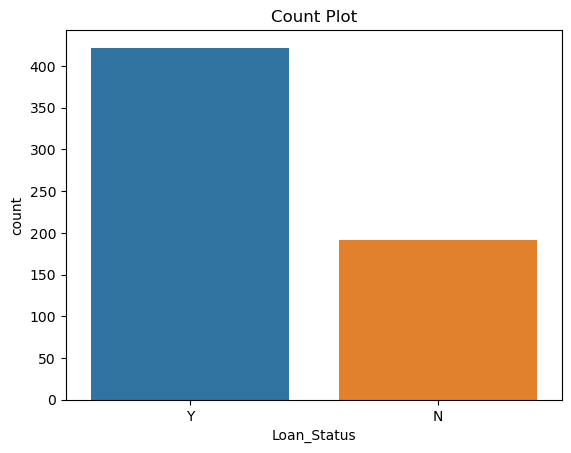

In [12]:
#checking count of values present in  target variable
sb.countplot(data=df,x='Loan_Status')
plt.title('Count Plot')
plt.show()

Most of the applicants are eligible to be availed the Loan requested.

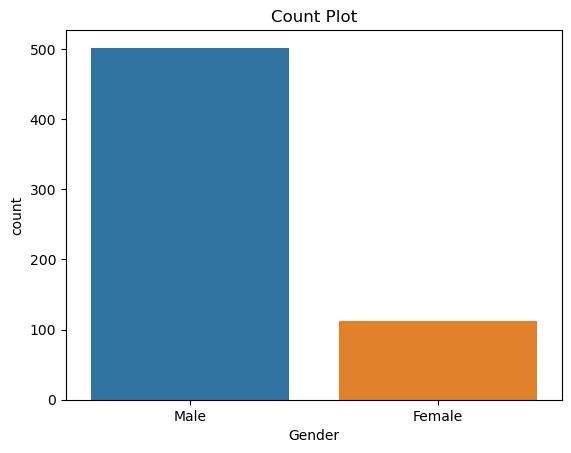

In [13]:
#checking count of values present in 'Gender' feature
sb.countplot(data=df,x='Gender')
plt.title('Count Plot')
plt.show()

Most of the applicants are 'Male'.

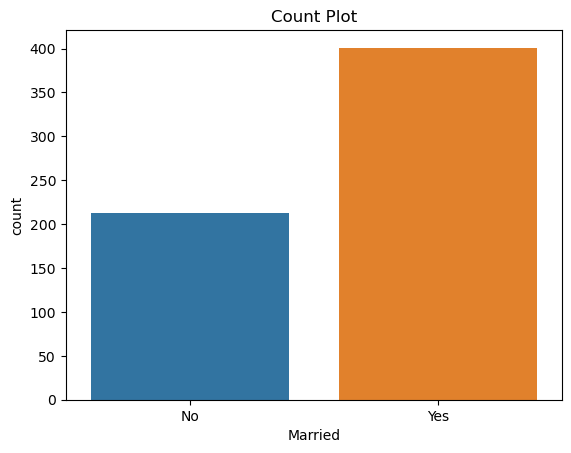

In [14]:
#checking count of values present in 'Married' feature
sb.countplot(data=df,x='Married')
plt.title('Count Plot')
plt.show()

Most of the applicants are Married.

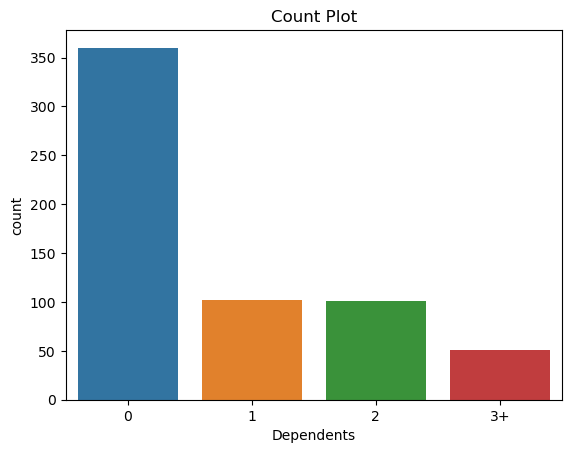

In [15]:
#checking count of values present in 'Dependents' feature
sb.countplot(data=df,x='Dependents')
plt.title('Count Plot')
plt.show()

Most of the applicants have **'0' Dependents.**

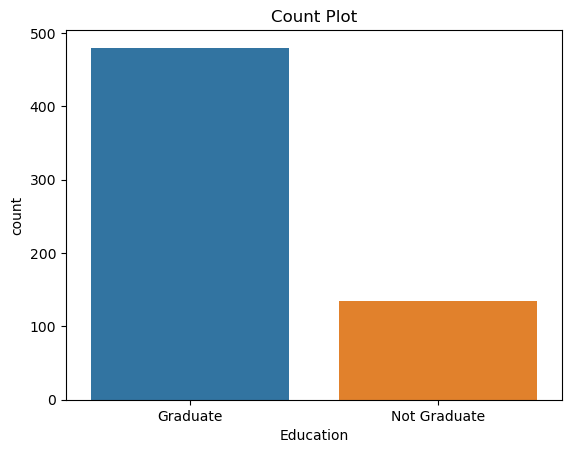

In [16]:
#checking count of values present in 'Education' feature
sb.countplot(data=df,x='Education')
plt.title('Count Plot')
plt.show()

Most of the applicants are Graduated.

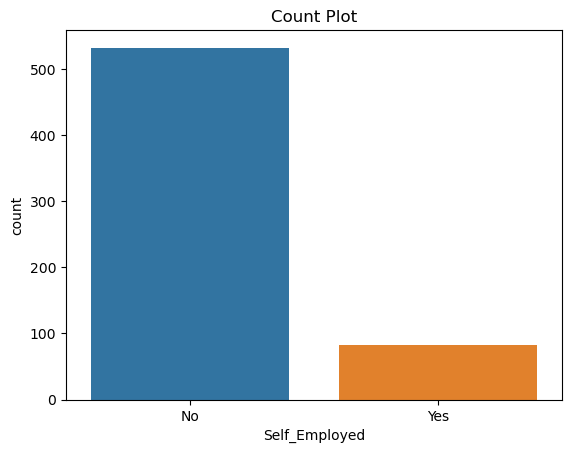

In [17]:
#checking count of values present in 'Self_Employed' feature
sb.countplot(data=df,x='Self_Employed')
plt.title('Count Plot')
plt.show()

Most of the applicants are not self employed.

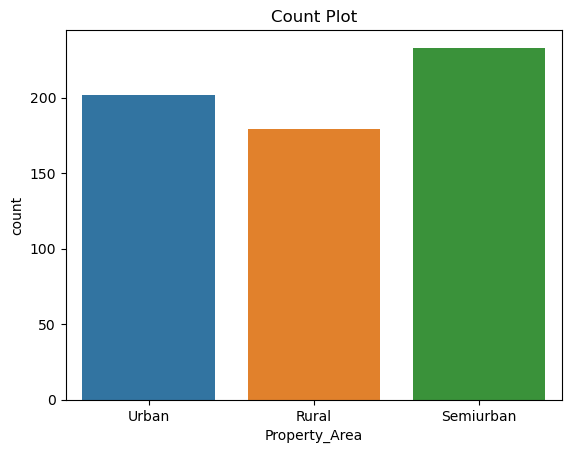

In [18]:
#checking count of values present in 'Property_Area' feature
sb.countplot(data=df,x='Property_Area')
plt.title('Count Plot')
plt.show()

**Majority** of the **applicants have 'Semiurban' property area**. 'Urban' property area is little more than 'Rural' property area.

In [19]:
col=df.columns.to_list()#updating 'col' list

#creating empty lists
cat_c=[]
num_c=[]

for i in col:#Iterating through 'col' list
    
    if df[i].dtypes=='object': #using if condition to check for 'object' data type
        cat_c.append(i)#appending 'i'
        
    elif df[i].dtypes=='int64' or 'float64': #using elif condition to check for 'float64' and 'int64' data types
        num_c.append(i)#appending 'i'        

In [20]:
log=[]#creating empty list which is stored in 'log' variable 

def re():#creating a function named 're'
    
    for i in num_c:#iterating through 'col' variable
        if i not in log:#using if condition to plot graphs
            sb.lmplot(data=df,x=log[-1],y=i)
            plt.title('Linear Model Plot')
    plt.show()

In [21]:
#checking contents of 'num_c' list
num_c

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

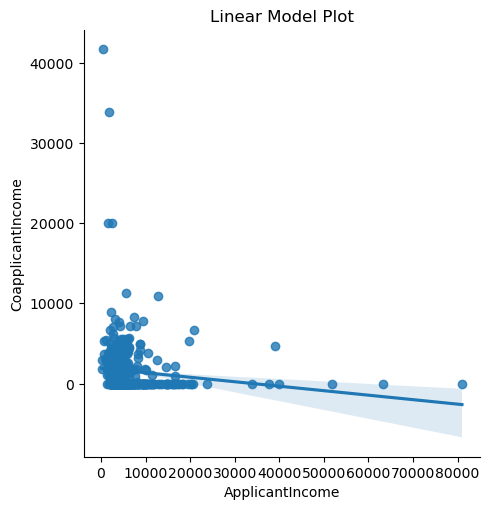

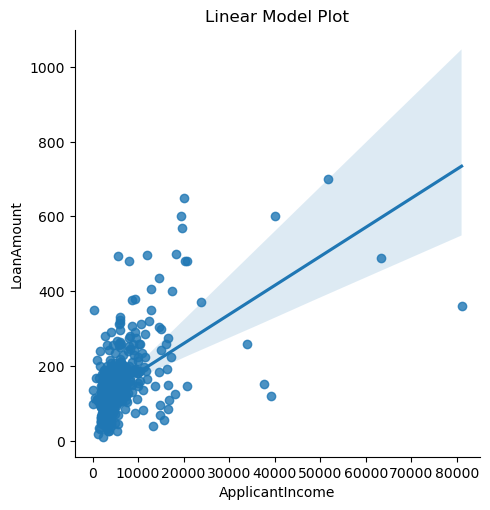

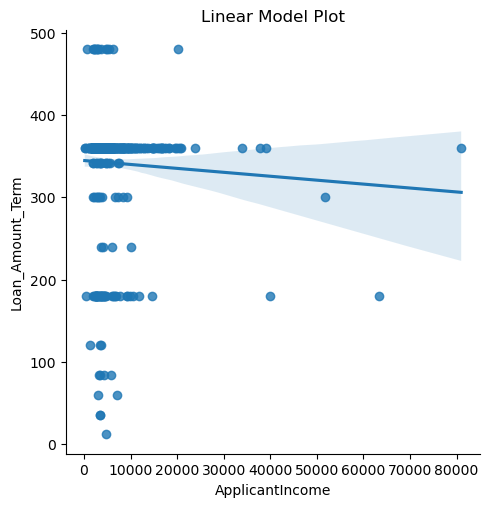

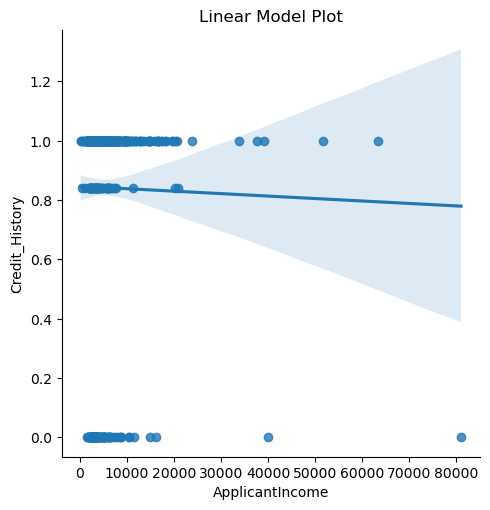

In [22]:
#checking linear relation of 'ApplicantIncome' feature with other features 
log.append('ApplicantIncome')#Appending feature
re()#calling function

**'ApplicantIncome'** feature has **low negative linear relation** with **'CoapplicantIncome'** feature.   
  
**'ApplicantIncome'** feature has **high positive linear relation** with **'LoanAmount'** feature.  
    
**'ApplicantIncome'** feature has **almost no linear relation** with other remaining features.

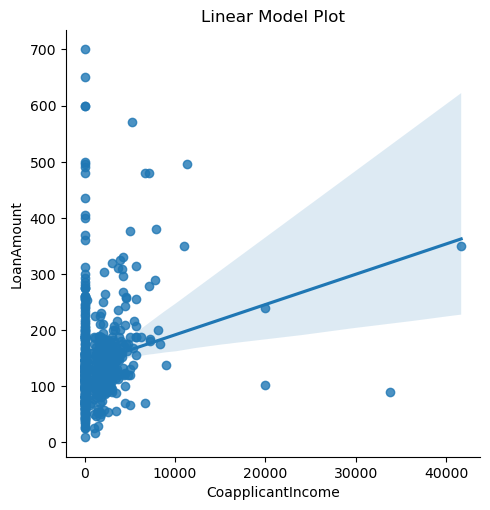

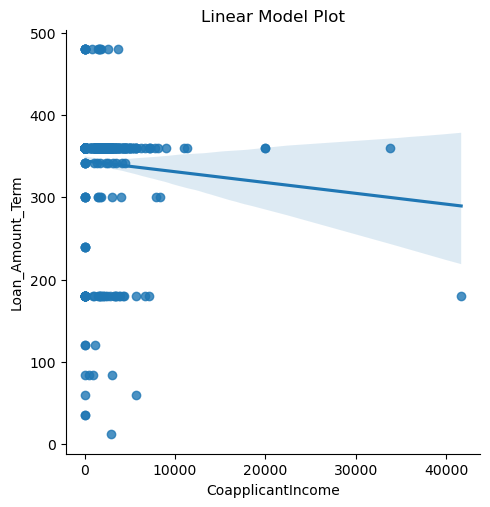

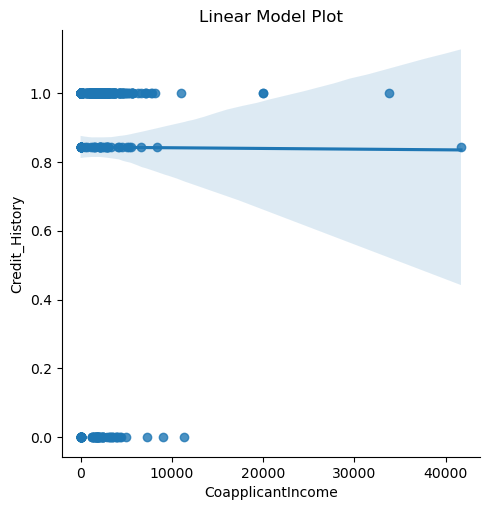

In [23]:
#checking linear relation of 'CoapplicantIncome' feature with other features 
log.append('CoapplicantIncome')#Appending feature
re()#calling function

**'CoapplicantIncome'** feature has **low positive linear relation** with **'LoanAmount'** feature.  
    
**'CoapplicantIncome'** feature has **almost no linear relation** with other remaining features.

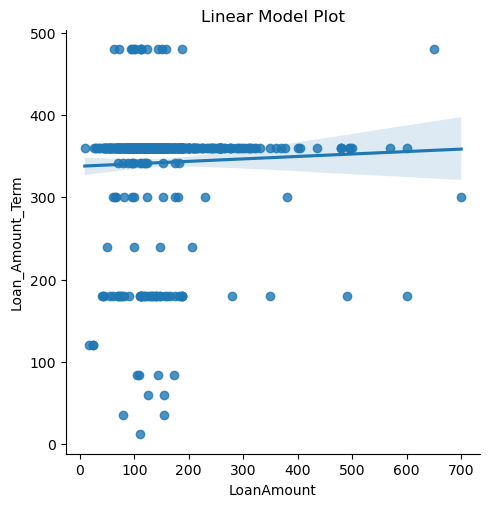

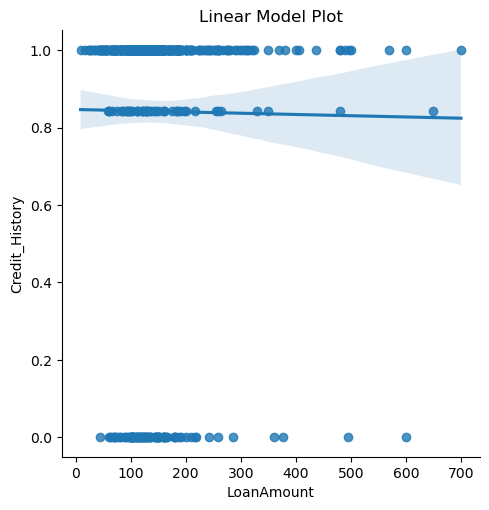

In [24]:
#checking linear relation of 'LoanAmount' feature with other features 
log.append('LoanAmount')#Appending feature
re()#calling function

**'LoanAmount'** feature has **almost no linear relation** with other remaining features.

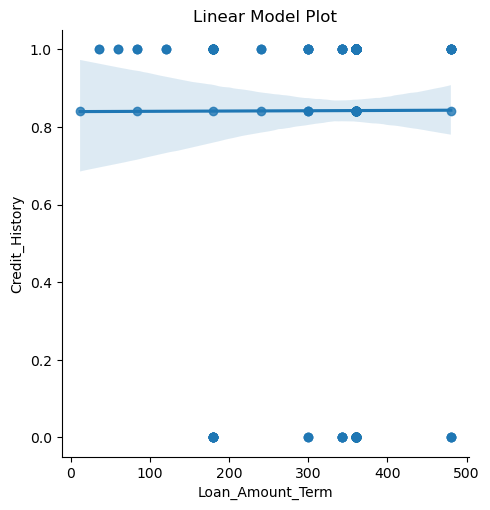

In [25]:
#checking linear relation between 'Loan_Amount_Term' and 'Credit_History' features
log.append('Loan_Amount_Term')#Appending feature
re()#calling function

**'Loan_Amount_Term' and 'Credit_History'** features **do not have linear relation** between them.

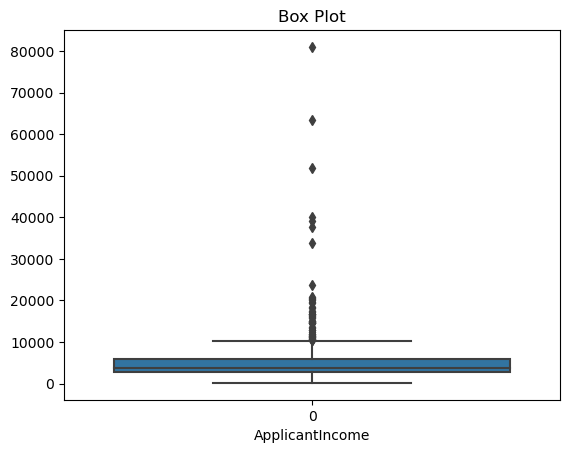

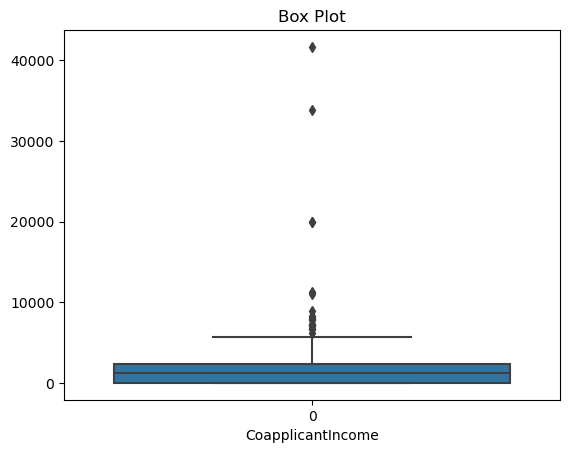

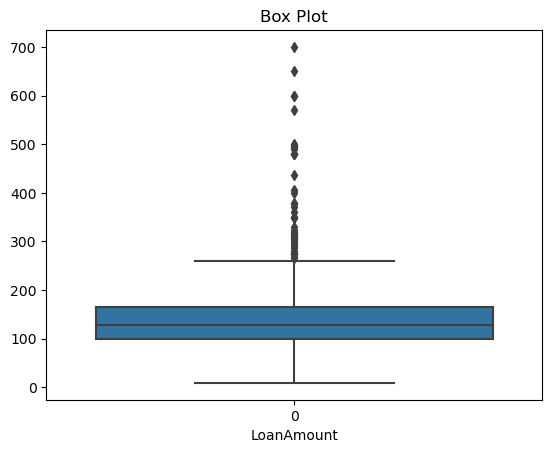

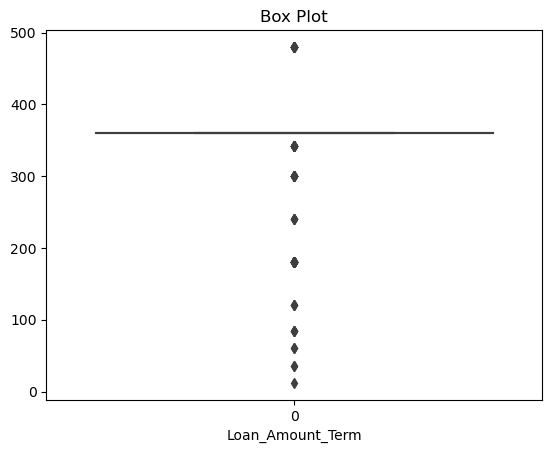

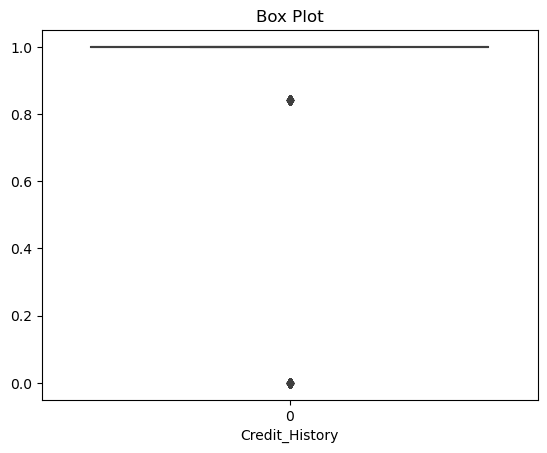

In [26]:
#Checking outliers via Box Plot
for i in num_c:
    sb.boxplot(df[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

All numerical features contains outliers.

In [27]:
#removing outliers using zscore method
#Importing necessary libraries
from scipy.stats import zscore as zs

f_outlier=df[num_c]
z=np.abs(zs(f_outlier))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.451640
1,0.134412,0.038732,0.219273,0.279851,0.451640
2,0.393747,0.554487,0.957641,0.279851,0.451640
3,0.462062,0.251980,0.314547,0.279851,0.451640
4,0.097728,0.554487,0.064454,0.279851,0.451640
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851,0.451640
610,0.212557,0.554487,1.267279,2.518655,0.451640
611,0.437174,0.472404,1.269371,0.279851,0.451640
612,0.357064,0.554487,0.483367,0.279851,0.451640


The **variable 'z'** holds the **zscores values** of these features.

In [28]:
#checking outliers as per the threshold value as '3'
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [29]:
#checking value of the outliers
z.iloc[9,1]

3.196712546212882

In [30]:
z.iloc[14,3]

3.451490032828143

In [31]:
z.iloc[68,3]

4.384325176835749

In [32]:
z.iloc[94,3]

3.451490032828143

We can confirm that these values holds outlier as per the threshold value.

In [33]:
#Removing outliers 
zscore=df[(z<3).all(axis=1)]#storing values in 'zscore' variable

In [34]:
#Using IQR method to remove outliers from the original data frame
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=df[~((df< (q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [35]:
print('Data loss percentage after removing outliers via zscore method',((df.shape[0]-zscore.shape[0])/df.shape[0])*100)
print('Data loss percentage after removing outliers via IQR method',((df.shape[0]-IQR.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers via zscore method 6.026058631921824
Data loss percentage after removing outliers via IQR method 42.99674267100978


We can observe that **zscore method performed well** than IQR method, hence, we will **update** the data frame with **zscore method.**

In [36]:
outliers=df.shape[0]-zscore.shape[0]#storing number of outliers removed in 'outliers' variable

print(f'Outliers removed : {outliers}')#printing
df=zscore#Updating data frame

Outliers removed : 37


In [37]:
df.shape#checking shape of data frame

(577, 12)

Now the data frame has **577 rows.**

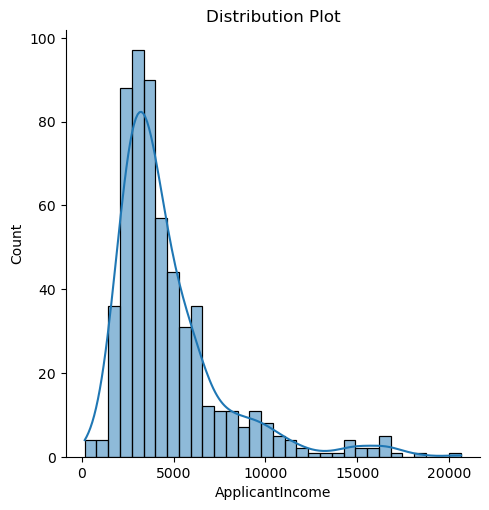

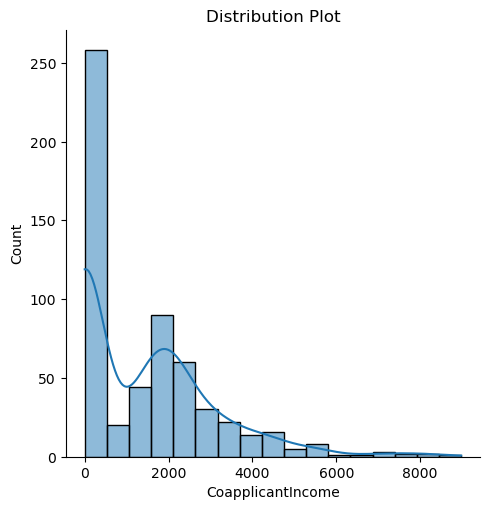

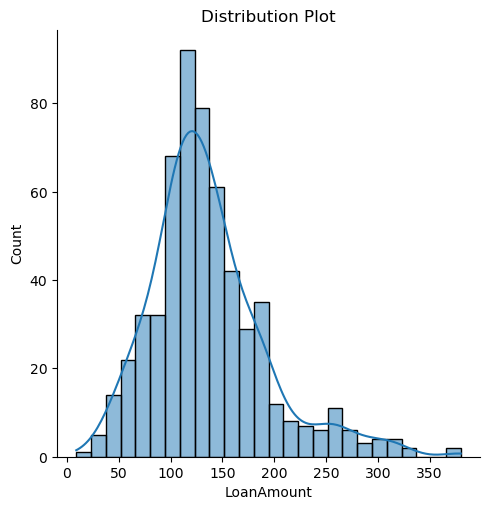

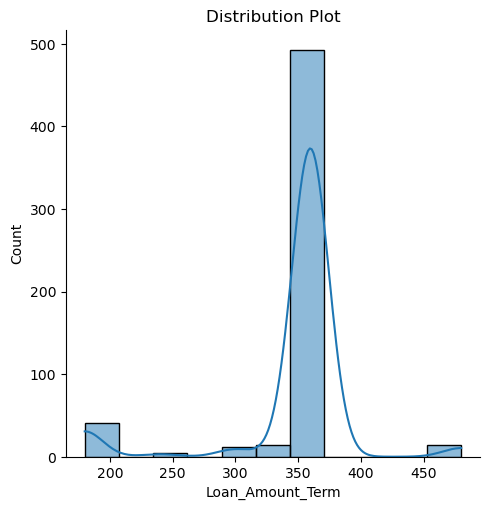

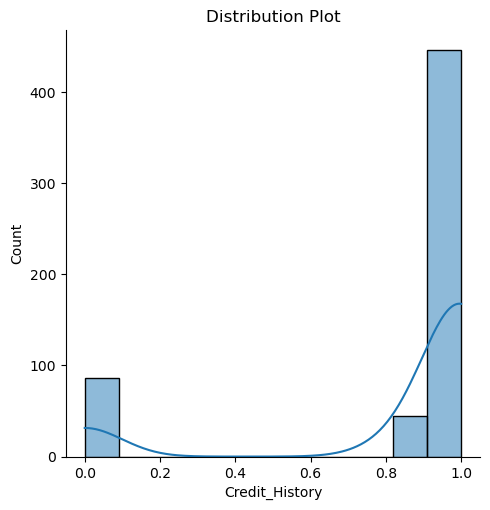

In [38]:
#checking distribution of columns
for i in num_c:
    sb.displot(df[i],kde=True)
    plt.title('Distribution Plot')    

**'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount'** features are skewed to the right.  
  
**'Loan_Amount_Term' and 'Credit_History'** features are skewed to the left.

In [39]:
df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

All of these features are in **unaccpetable range**, thus , we can use **yeojohnson method** to remove skewness.

In [41]:
from scipy.stats import yeojohnson as yj #importing library

for i in num_c:#iterating through 'num_c' list
    
    df[i],p=yj(df[i])

df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
dtype: float64

**'Loan_Amount_Term' and 'Credit_History'** features are still in in **unaccpetable range**, thus , we can try **square root method** to remove skewness.

In [42]:
a=['Loan_Amount_Term', 'Credit_History']#creating list

for i in a:#iterating through 'a' list
    
    df[i]=np.sqrt(df[i]) #applying square root method
    
df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term    -1.571559
Credit_History      -1.808539
dtype: float64

Skewness is increased in both features, thus, we can revert it and  **try log +1 method**.

In [43]:
for i in a:#iterating through 'a' list
    
    df[i]=np.square(df[i]) #reverting square root method
    
df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
dtype: float64

Square root method is reverted successfully.

In [44]:
for i in a:#iterating through 'a' list
    
     df[i]=np.log1p(df[i])#applying log + 1 method
    
df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term    -2.724482
Credit_History      -1.906510
dtype: float64

Skewness is increased , therefore, we can revert changes and try cuberoot method.

In [45]:
for i in a:#iterating through 'a' list
    
     df[i]=np.expm1(df[i])#reverting log + 1 method
    
df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
dtype: float64

In [46]:
for i in a:#iterating through 'a' list
    
    df[i]=np.cbrt(df[i])#applying cube root method
    
df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term    -2.079660
Credit_History      -1.886663
dtype: float64

Skewness is increased , therefore, we can revert changes.

In [47]:
for i in a:#iterating through 'a' list
    
    df[i]=df[i]**3 #reverting cube root method
    
df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
dtype: float64

We have applied various applicable methods, thus we can **accpet  these value as a threshold values**.  

In [48]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,11.194697,0.000000,13.201111,1.492217e+07,39.925492,Urban,Y
1,Male,Yes,1,Graduate,No,10.799279,9.832468,12.482026,1.492217e+07,39.925492,Rural,N
2,Male,Yes,0,Graduate,Yes,10.125222,0.000000,9.390267,1.492217e+07,39.925492,Urban,Y
3,Male,Yes,0,Not Graduate,No,9.891003,10.631416,12.148447,1.492217e+07,39.925492,Urban,Y
4,Male,No,0,Graduate,No,11.236333,0.000000,12.996190,1.492217e+07,39.925492,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,10.071991,0.000000,9.697075,1.492217e+07,39.925492,Rural,Y
610,Male,Yes,3+,Graduate,No,10.622891,0.000000,7.486669,1.892459e+06,39.925492,Rural,Y
611,Male,Yes,1,Graduate,No,11.725354,6.825818,16.498185,1.492217e+07,39.925492,Urban,Y
612,Male,Yes,2,Graduate,No,11.621649,0.000000,14.599374,1.492217e+07,39.925492,Urban,Y


In [50]:
for i in cat_c:#iterating through 'cat_c' list
    
    df[i]=le.fit_transform(df[i])#Transforming columns

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,11.194697,0.000000,13.201111,1.492217e+07,39.925492,2,1
1,1,1,1,0,0,10.799279,9.832468,12.482026,1.492217e+07,39.925492,0,0
2,1,1,0,0,1,10.125222,0.000000,9.390267,1.492217e+07,39.925492,2,1
3,1,1,0,1,0,9.891003,10.631416,12.148447,1.492217e+07,39.925492,2,1
4,1,0,0,0,0,11.236333,0.000000,12.996190,1.492217e+07,39.925492,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,10.071991,0.000000,9.697075,1.492217e+07,39.925492,0,1
610,1,1,3,0,0,10.622891,0.000000,7.486669,1.892459e+06,39.925492,0,1
611,1,1,1,0,0,11.725354,6.825818,16.498185,1.492217e+07,39.925492,2,1
612,1,1,2,0,0,11.621649,0.000000,14.599374,1.492217e+07,39.925492,2,1


All the catagorical data have been encoded. In **target variable**, **'1'** represents **'Y'** and **'0'** represents **'N'**.

In [51]:
#Checking correlation between independant and dependant variables
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.173082,-0.097638,0.022963,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.182006,-0.128208,0.000163,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131807,-0.074341,-0.009378,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.126509,-0.067928,-0.089174,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117550,-0.052342,-0.011045,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.434072,-0.088056,0.045597,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.196334,-0.002204,-0.008985,-0.074476,0.079344
LoanAmount,0.173082,0.182006,0.131807,-0.126509,0.117550,0.434072,0.196334,1.000000,0.022149,-0.011859,-0.094220,-0.028999
Loan_Amount_Term,-0.097638,-0.128208,-0.074341,-0.067928,-0.052342,-0.088056,-0.002204,0.022149,1.000000,0.007488,-0.032706,-0.053447
Credit_History,0.022963,0.000163,-0.009378,-0.089174,-0.011045,0.045597,-0.008985,-0.011859,0.007488,1.000000,-0.012726,0.537357


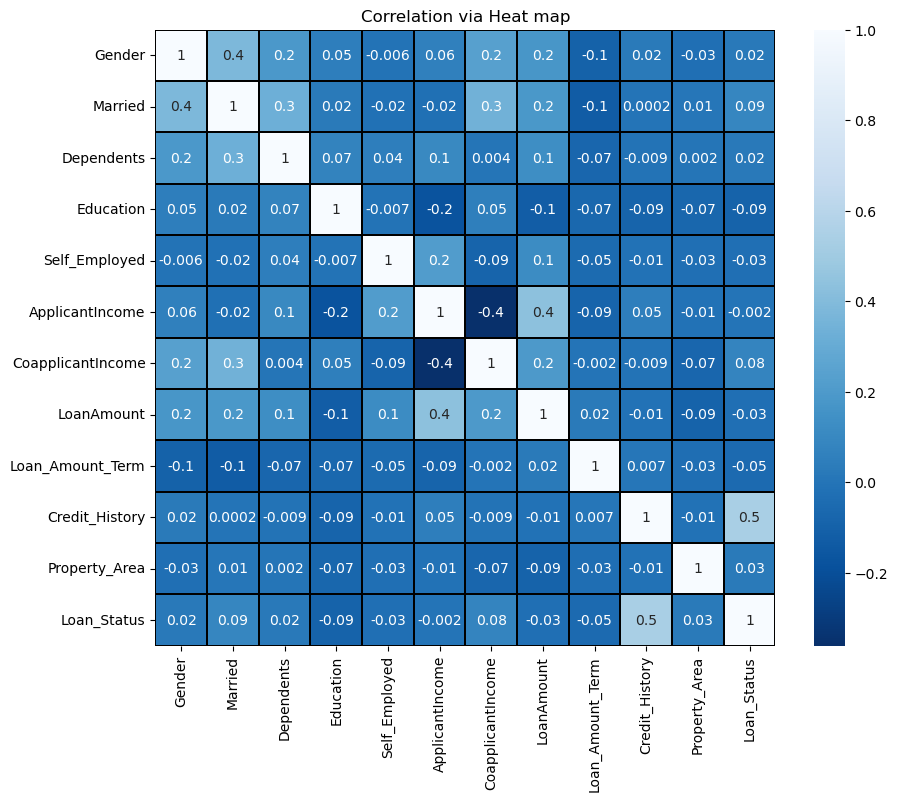

In [53]:
#Visualizing correlation via heat map
plt.figure(figsize=(10,8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
  
1)**Most features** have **very low correlation** with **target variable.** 
  
2)**'Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount' and  'Loan_Amount_Term'** features have **low negative correlation** with **target variable.**  
  
3)**'Gender', 'Married', 'Dependents', 'CoApplicantIncome' and 'Property_Area'** features have **low positive correlation** with **target variable.**  
  
4)**'Credit_History'** feature has **moderate positive linear relation** with **target variable**. 
 

In [54]:
#Separating features and target variable 
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']    

In [55]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape,'\nDimensions of label:',y.shape)

Dimensions of features: (577, 11) 
Dimensions of label: (577,)


We can observe that both features and lable have **same number of rows**.  
'x' contains 11 features.

In [56]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc

sc=sc()#creating instance

x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)#transforming data
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.142609,0.515236,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.142609,0.515236,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.142609,0.515236,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.142609,0.515236,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.142609,0.515236,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.142609,0.515236,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.559206,0.515236,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.142609,0.515236,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.142609,0.515236,1.227472


The data is scaled using StandarScaler method to overcome the **issue of biasness.**

In [57]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library

v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.222340,Gender
1,1.417550,Married
2,1.167355,Dependents
3,1.069183,Education
4,1.053423,Self_Employed
5,1.766087,ApplicantIncome
6,1.584405,CoapplicantIncome
7,1.549563,LoanAmount
8,1.048147,Loan_Amount_Term
9,1.012900,Credit_History


There is no problem of multicollinearity.

In [58]:
y.value_counts()#checking value counts of 'y'

1    398
0    179
Name: Loan_Status, dtype: int64

This shows that this data is imbalanced , to balance data, we can use oversampling method.

In [59]:
#oversampling the data
from imblearn.over_sampling import SMOTE #importing necessary library

sm=SMOTE()#creating instance

x1,y1=sm.fit_resample(x,y)#sampling data

In [60]:
y1.value_counts()#checking value counts of 'y1'

1    398
0    398
Name: Loan_Status, dtype: int64

The data is balanced now.

In [61]:
#checking number of sampled data  
print('Dimensions of features before sampling:',x.shape[0],'\nDimensions of label before sampling:',y.shape[0],'\nDimensions of features after sampling:',x1.shape[0],'\nDimensions of label after sampling:',y1.shape[0],'\nDiffernce = ',x1.shape[0]-x.shape[0])#printing

#Updating features and label
x=x1
y=y1

Dimensions of features before sampling: 577 
Dimensions of label before sampling: 577 
Dimensions of features after sampling: 796 
Dimensions of label after sampling: 796 
Differnce =  219


In [62]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts,cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC as SupportVectorClassifier

In [63]:
#Finding best random state on Random Forest Classifier
ac_updater=0#initilizing variable
rs_updater=0#initilizing variable

for i in range(1,100):#running 'if' loop for 99 times
    
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)#spliting data
    
    RFR=RandomForestClassifier()#creating instance
    
    RFR.fit(x_train,y_train)#fitting data
    pr=RFR.predict(x_test)#predicting data
    
    ac=accuracy_score(y_test,pr)#calculating accuracy score 
    
    if ac>ac_updater:#using if condition to update 'ac_updater' and 'rs_updater' only if 'ac' is greater than 'ac_updater'
        #updating values
        ac_updater=ac
        rs_updater=i

print('Max accuracy score during the iteration is ',ac_updater,'on randome state : ',rs_updater)#printing

Max accuracy score during the iteration is  0.8744769874476988 on randome state :  78


In [64]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#Spliting data on the best random state

In [65]:
#Creating instance of  various models
LR=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
BC=BaggingClassifier()
SVC=SupportVectorClassifier()

models=[LR,RFC,ETC,GBC,ABC,BC,SVC]#Creating list containing the instances of the models

log=float('inf')#Initializing 'log' variable  to positive infinity
    
for i in models:#Iterating models 
    
    i.fit(x_train,y_train)#fitting data 
    pr=i.predict(x_test)#predicting data
    
    A_score=accuracy_score(y_test,pr)#calculating accuracy  score
    C_matrix=confusion_matrix(y_test,pr)#calculating confusion matrix
    C_report=classification_report(y_test,pr)#calculating classification report
    
    score=cvs(i,x,y)#calculating Cross Validation Score
    diff=abs(A_score - score.mean())*100  #calculating difference of accuracy score and Cross Validation Score
    
    #Printing    
    print('\n','Accuracy score of',str(i).split('(')[0],'is',A_score,'\n','\nConfusion matrix of',str(i).split('(')[0],':\n',C_matrix,'\nClassification report of ',str(i).split('(')[0],':\n',C_report,'\n')
    print('\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between Accuracy score and cross validation is ',diff)

    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when log is greater than diff and mean of score in not negative
        
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between accuracy score and cross validation i.e {b_d}')#Printing 


 Accuracy score of LogisticRegression is 0.7824267782426778 
 
Confusion matrix of LogisticRegression :
 [[ 74  36]
 [ 16 113]] 
Classification report of  LogisticRegression :
               precision    recall  f1-score   support

           0       0.82      0.67      0.74       110
           1       0.76      0.88      0.81       129

    accuracy                           0.78       239
   macro avg       0.79      0.77      0.78       239
weighted avg       0.79      0.78      0.78       239
 


Cross validation Score of LogisticRegression is [0.73125    0.71069182 0.69811321 0.72327044 0.70440252] 
Mean:  0.7135455974842767 
Difference between Accuracy score and cross validation is  6.888118075840111

 Accuracy score of RandomForestClassifier is 0.8702928870292888 
 
Confusion matrix of RandomForestClassifier :
 [[ 95  15]
 [ 16 113]] 
Classification report of  RandomForestClassifier :
               precision    recall  f1-score   support

           0       0.86      0.86    

Here by comparing difference of accuracy score and cross validation  of various models, we can conclude that **AdaBoostClassifier is the best performing model** as it has the least difference between accuracy score and cross validation than the rest of the models.

In [66]:
#Using GridSearchCV  for hyperparameter tuning
from sklearn.model_selection import GridSearchCV as GSC#Importing required library

pa={'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.3,0.5,0.7,1.0],'algorithm':['SAMME','SAMME.R']}#defining hyper parameters

gsc=GSC(ABC,pa)#creating instance

gsc.fit(x_train,y_train)#fitting data
gsc.best_params_#fetching best parameters 

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}

In [68]:
#Applying best parameters provided by GridSearchCV
final=AdaBoostClassifier(n_estimators=200,learning_rate=1.0,algorithm='SAMME')

In [69]:
final.fit(x_train,y_train)#fitting data 
pr=final.predict(x_test)#predicting data

ac=accuracy_score(y_test,pr)
print(ac)

0.8200836820083682


Model's accuracy score is increased from 74% to 82%.

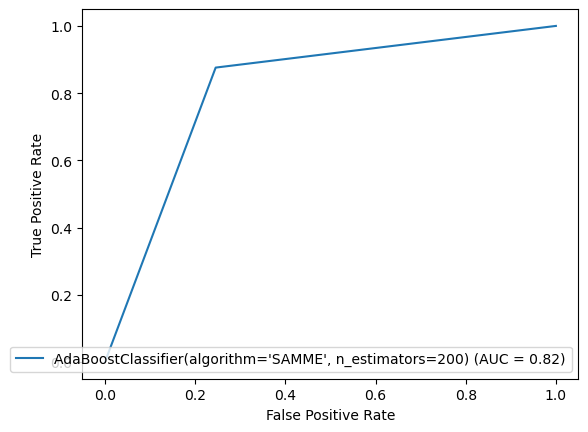

In [70]:
#Ploting roc curve
#Importing necessary libraries
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds=roc_curve(y_test,pr)#Calculating ROC curve values
roc_auc=auc(fpr,tpr)#calculating AUC
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)#Creating a ROC curve display
display.plot()
plt.show()

**AUC** value is **0.82**, which means the model **performs well** in **distinguishing between the classes**.

In [71]:
#Conclusion
Predicted_values=final.predict(x_test)#storing predicted values in 'Predicted_values' variable
Original_values=y_test#storing original values in 'Original_values' variable

#creating new data frame with Predicted and Original values
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})

In [72]:
#replacing encoding values with original values
conclusion.replace(1,'Y',inplace=True)
conclusion.replace(0,'N',inplace=True)

In [73]:
conclusion.sample(20)

,Predicted Values,Original Values
127,Y,Y
502,N,N
522,N,N
496,Y,Y
42,Y,Y
331,N,Y
239,Y,Y
361,Y,Y
46,N,N
548,Y,Y


Here we can conclude that the model **predicted values are close to original values.**

In [74]:
#Saving the model
import joblib#importing library
joblib.dump(final,r'D:\Models\LAS.obj')#saving model into desired path

['D:\\Models\\LAS.obj']